In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/Users/zivlazarov/Projects/Datasets/nyc-taxi-trip-duration/train.csv')
test_df = pd.read_csv('/Users/zivlazarov/Projects/Datasets/nyc-taxi-trip-duration/test.csv')

In [38]:
import matplotlib.pyplot as plt

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


(array([3.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.77000e+02,
        0.00000e+00, 0.00000e+00, 3.18000e+02, 0.00000e+00, 3.17000e+02,
        2.84000e+02, 1.92000e+02, 2.18000e+02, 2.06000e+02, 2.39000e+02,
        3.46000e+02, 1.52000e+02, 4.86000e+02, 2.75000e+02, 4.05000e+02,
        3.69000e+02, 5.19000e+02, 6.05000e+02, 6.01000e+02, 6.81000e+02,
        9.10000e+02, 1.10700e+03, 1.74100e+03, 2.46400e+03, 3.81800e+03,
        5.68500e+03, 8.34400e+03, 1.22910e+04, 1.90720e+04, 2.61110e+04,
        3.62970e+04, 4.73660e+04, 6.02990e+04, 7.34880e+04, 8.68190e+04,
        1.00340e+05, 1.10184e+05, 1.15832e+05, 1.19777e+05, 1.15537e+05,
        1.09411e+05, 9.68180e+04, 8.22430e+04, 6.61490e+04, 4.93260e+04,
        3.53080e+04, 2.38990e+04, 1.63440e+04, 1.05360e+04, 6.33300e+03,
        3.56000e+03, 1.70600e+03, 6.48000e+02, 2.14000e+02, 8.40000e+01,
        3.30000e+01, 2.30000e+01, 1.90000e+01, 1.00000e+01, 3.00000e+00,
        1.00000e+01, 1.20000e+01, 1.20000e+01, 1.90

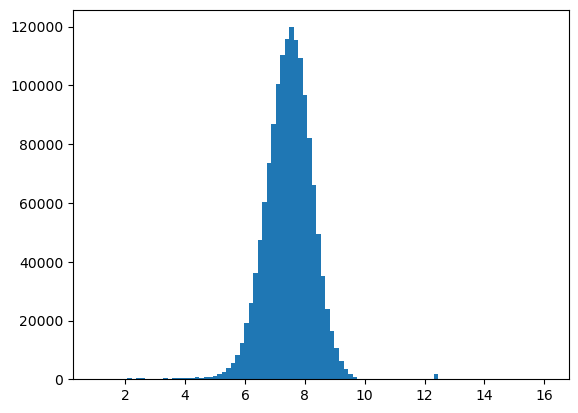

In [39]:
# check if the trip_duration is evenly distributed
train_df['log_trip_duration'] = np.log(train_df['trip_duration']) + 1
plt.hist(train_df['log_trip_duration'], bins=100)

In [5]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.120297
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,7.496775
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,8.661056
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.061457
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.075346


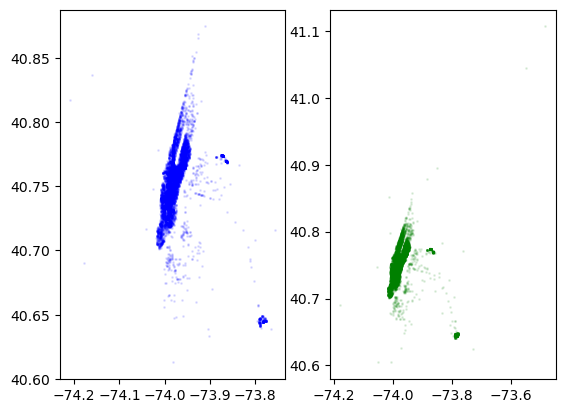

In [6]:
num_of_samples = 10000
figure, ax = plt.subplots(ncols=2)
# check if the pickup spots are roughly the same between the 2 datasets
ax[0].scatter(train_df['pickup_longitude'][:num_of_samples], train_df['pickup_latitude'][:num_of_samples], color='blue', alpha=0.1, s=1)
ax[1].scatter(test_df['pickup_longitude'][:num_of_samples], test_df['pickup_latitude'][:num_of_samples], color='green', alpha=0.1, s=1)
# getting an overview of the manhattan map

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['store_and_fwd_flag'] = label_encoder.fit_transform(train_df['store_and_fwd_flag'])

X = train_df.drop(['trip_duration', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration',\
                   'log_trip_duration'], axis=1)
y = train_df['log_trip_duration'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

In [27]:
import xgboost
from sklearn.linear_model import LinearRegression

In [68]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_preds = linear_regression.predict(X_test)

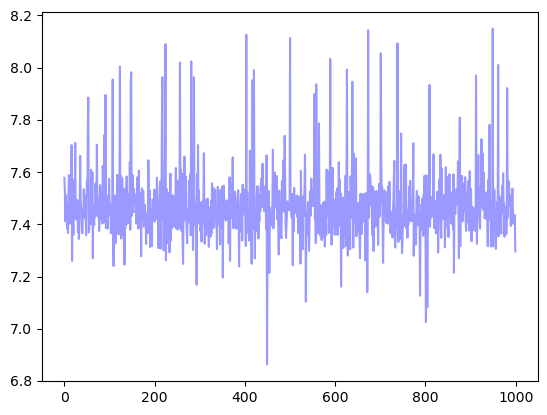

In [69]:
plt.plot(linear_regression_preds[:1000], color='blue', alpha=0.4)

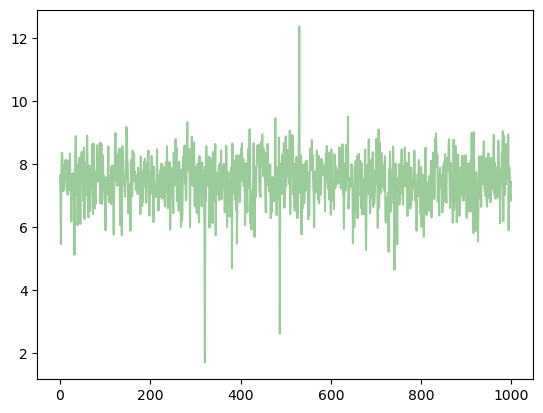

In [70]:
plt.plot(y_test[:1000], color='green', alpha=0.4)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
xgb_regression = GradientBoostingRegressor()

In [72]:
xgb_regression.fit(X_train, y_train)
xgb_regression_preds = xgb_regression.predict(X_test)

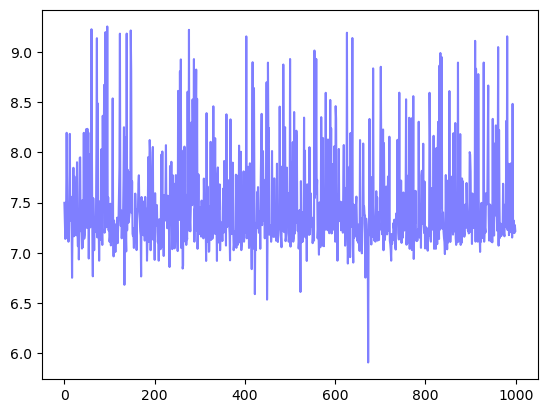

In [73]:
plt.plot(xgb_regression_preds[:1000], color='blue', alpha=0.5)

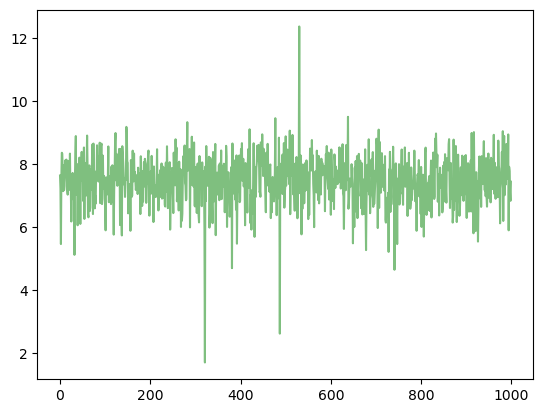

In [74]:
plt.plot(y_test[:1000], color='green', alpha=0.5)

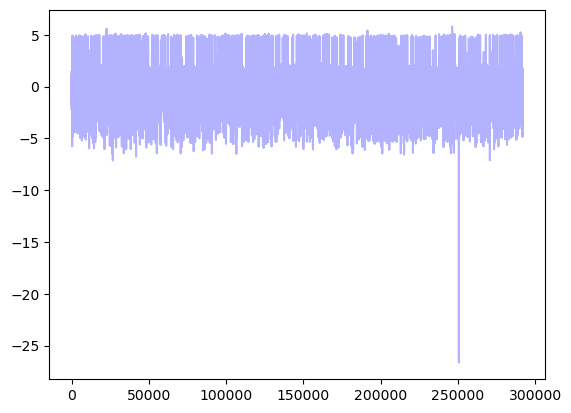

In [75]:
plt.plot(y_test-linear_regression_preds, color='blue', alpha=0.3)

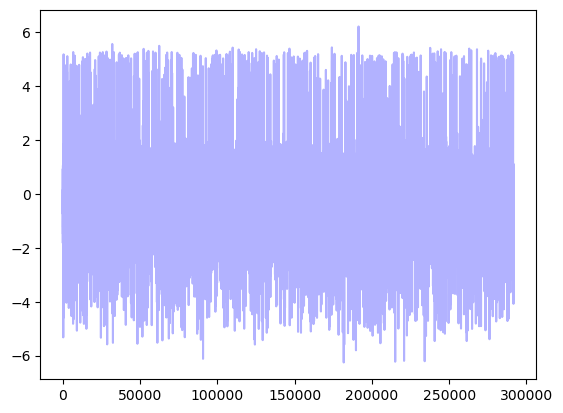

In [76]:
plt.plot(y_test-xgb_regression_preds, color='blue', alpha=0.3)

In [59]:
test_df['store_and_fwd_flag'] = label_encoder.fit_transform(test_df['store_and_fwd_flag'])
X = test_df.drop(['id', 'vendor_id', 'pickup_datetime'], axis=1)
# xgb_regression_test_preds = xgb_regression.predict()

In [78]:
xgb_regression_test_preds = xgb_regression.predict(X)

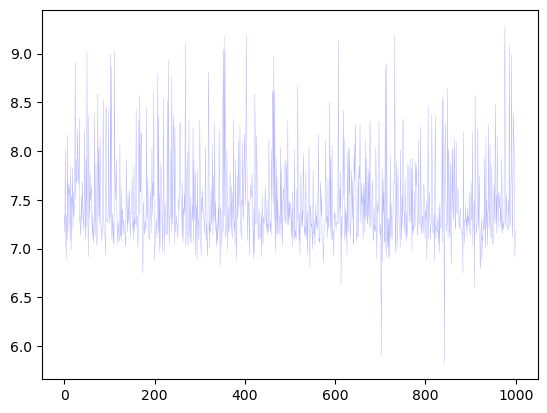

In [86]:
plt.plot(xgb_regression_test_preds[:1000], color='blue', alpha=0.3, linewidth=0.3)